### Analyze repetition parameters

In [6]:
from utils import find_files, read_json
from collections import defaultdict
from matplotlib import pyplot as plt

result_files = find_files("../experiments/outputs/claude-3-5-sonnet-20240620/pilot/**/run1")

repetition_map = {}

for f in result_files:
    results = read_json(f)
    temperature = results["metadata"]["model_args"]["temperature"]
    top_p = results["metadata"]["model_args"]["top_p"]

    for sample in results["data"]:
        if temperature == 0:
            continue
        story = sample["output"]
        if story not in repetition_map:
            repetition_map[story] = {"temperature": defaultdict(int), "top_p": defaultdict(int)}
        repetition_map[story]["temperature"][temperature] += 1
        repetition_map[story]["top_p"][top_p] += 1

# compute temperature distribution
temperature_distribution = {}
for story, counts in repetition_map.items():
    for temperature, count in counts["temperature"].items():
        if temperature not in temperature_distribution:
            temperature_distribution[temperature] = []
        temperature_distribution[temperature].append(count)

# compute top_p distribution
top_p_distribution = {}
for story, counts in repetition_map.items():
    for top_p, count in counts["top_p"].items():
        if top_p not in top_p_distribution:
            top_p_distribution[top_p] = []
        top_p_distribution[top_p].append(count)

In [7]:
temperature_distribution

{0.5: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.9: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 1.0: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.7: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.3: [1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

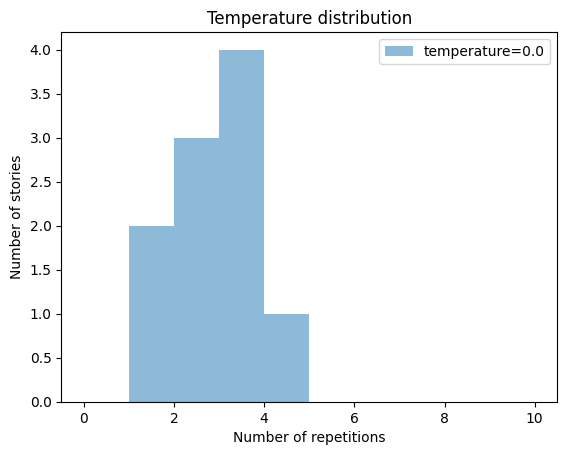

In [3]:
# plot temperature distribution
plt.figure()
# for temperature, counts in temperature_distribution.items():
#     plt.hist(counts, bins=range(0, 11), alpha=0.5, label=f"temperature={temperature}")
plt.hist(temperature_distribution[0.0], bins=range(0, 11), alpha=0.5, label="temperature=0.0")
plt.legend()
plt.title("Temperature distribution")
plt.xlabel("Number of repetitions")
plt.ylabel("Number of stories")
plt.savefig("temperature_distribution.png")

In [8]:
top_p_distribution

{0.9: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.7: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 1.0: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.3: [2, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.5: [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.95: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}